In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Q1_Sms_data_v1.csv")

In [3]:
dataset.head(15)

,address,body,Date
0,SBIPSG,Rs.200.00 was spent on your SBI Card ending 88...,27/05/18
1,SBIPSG,"Rs.1,697.00 was spent on your SBI Card ending ...",9/4/2018 0:00
2,SBIPSG,Rs.199.00 was spent on your SBI Card ending 88...,14/05/18
3,SBIPSG,Rs.817.00 was spent on your SBI Card ending 99...,30/03/18
4,CBSSBI,"INR 9,173.00 credited to your A/c No 1234 on 1...",17/04/18
5,CBSSBI,"INR 8,000.00 credited to your A/c No 4567 on 2...",24/04/18
6,CBSSBI,INR 500.00 credited to your A/c No 1234 on 17/...,17/04/18
7,SBIINB,Your AC 1234 Debited INR 64.42 on 22/04/18 -SM...,22/04/18
8,SBIINB,Your AC 1234 Debited INR 9.00 on 25/04/18 -SMS...,25/04/18
9,SBIINB,"Your AC 4567 Debited INR 12,000.00 on 03/04/18...",3/4/2018 0:00


In [4]:
dataset['body']

0     Rs.200.00 was spent on your SBI Card ending 88...
1     Rs.1,697.00 was spent on your SBI Card ending ...
2     Rs.199.00 was spent on your SBI Card ending 88...
3     Rs.817.00 was spent on your SBI Card ending 99...
4     INR 9,173.00 credited to your A/c No 1234 on 1...
5     INR 8,000.00 credited to your A/c No 4567 on 2...
6     INR 500.00 credited to your A/c No 1234 on 17/...
7     Your AC 1234 Debited INR 64.42 on 22/04/18 -SM...
8     Your AC 1234 Debited INR 9.00 on 25/04/18 -SMS...
9     Your AC 4567 Debited INR 12,000.00 on 03/04/18...
10    Dear SBI Cardholder, the usage on your card en...
11    Dear SBI Cardholder, your card payment is over...
12    Dear applicant, Thank you for showing interest...
13    Dear abc, processing of your KYC documents is ...
14    290/39020202 (prefix local STD code) or simply...
15    Dear XYZ, please link your Aadhaar number imme...
16    Pay your credit card outstanding with YONO by ...
17    681498 is your OTP for online transaction 

In [5]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem.porter import PorterStemmer

In [6]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
stop_words_extended = ['rs','sbi','freecharge','aditya','birla','airtel', 
                        'inr','qqq','xyz','abcd','aaaa','httpsbitlycompayeasy', 
                      'please','airtelin','plz','buddy','utr','dear','b','c','sm','bw', 'e','yono','yatra',
                      'hush', 'puppiesbata', 'mark', 'spen','sms']
stop_words.extend(stop_words_extended)
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
ps = PorterStemmer()

In [7]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces 
    doc = doc.lower()
    doc = re.sub("[^A-Za-z\s]", '', doc)
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [8]:
norm_corpus = normalize_corpus(dataset['body'])
norm_corpus

array(['spent card ending available credit limit',
       'spent card ending available credit limit',
       'spent card ending available credit limit',
       'spent card ending available credit limit', 'credited ac neft',
       'credited ac neft', 'credited ac neft',
       'ac debited charge avl bal', 'ac debited charge avl bal download',
       'ac debited towards cash payment cheque avl bal',
       'cardholder usage card ending exceeded credit limit avoid transaction decline making immediate payment',
       'cardholder card payment overdue visit pay card bill online',
       'applicant thank showing interest simply save visa representative contact shortly',
       'abc processing kyc document completed updated record card',
       'prefix local std code simply hotel flight holiday mark',
       'link aadhaar number immediately per government india mandate submit aadhaar number march avoid deactivation credit card account',
       'pay credit card outstanding app earn reward poi

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
b = pd.DataFrame(cv_matrix, columns=vocab)
b

,aadhaar,abc,ac,account,app,applicant,available,avl,avoid,bal,...,spent,std,submit,thank,towards,transaction,updated,usage,visa,visit
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
a = pd.DataFrame(bv_matrix, columns=vocab)
a

,aadhaar,aadhaar number,abc,abc processing,ac,ac debited,ac neft,account,app,app earn,...,transaction card,transaction decline,updated,updated record,usage,usage card,visa,visa representative,visit,visit pay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aadhaar,abc,ac,account,app,applicant,available,avl,avoid,bal,...,spent,std,submit,thank,towards,transaction,updated,usage,visa,visit
0,0.00,0.00,0.00,0.00,0.0,0.00,0.46,0.00,0.00,0.00,...,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.0,0.00,0.46,0.00,0.00,0.00,...,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.0,0.00,0.46,0.00,0.00,0.00,...,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.0,0.00,0.46,0.00,0.00,0.00,...,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.48,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.48,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.48,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.35,0.00,0.0,0.00,0.00,0.45,0.00,0.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.31,0.00,0.0,0.00,0.00,0.39,0.00,0.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.33,0.00,0.33,...,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290291,0.111760,0.000000,0.054297,0.000000,0.081494,0.142474,0.220046
1,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290291,0.111760,0.000000,0.054297,0.000000,0.081494,0.142474,0.220046
2,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290291,0.111760,0.000000,0.054297,0.000000,0.081494,0.142474,0.220046
3,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290291,0.111760,0.000000,0.054297,0.000000,0.081494,0.142474,0.220046
4,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.171572,0.148593,0.122846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.171572,0.148593,0.122846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.171572,0.148593,0.122846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.171572,0.171572,0.171572,1.000000,0.866068,0.533224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.148593,0.148593,0.148593,0.866068,1.000000,0.461808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.122846,0.122846,0.122846,0.533224,0.461808,1.000000,0.083951,0.097957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,0,1,0,2
1,2,18,0,3
2,3,19,0,4
3,4,5,0,2
4,6,21,0,3
5,7,8,0.206301,2
6,9,23,0.934662,3
7,10,17,1.07098,2
8,11,25,1.13011,3
9,12,14,1.29711,2


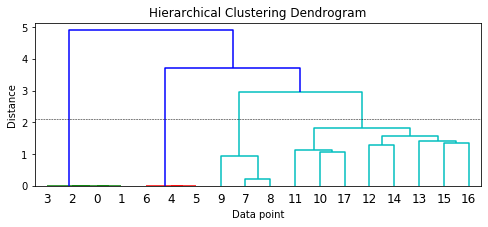

In [15]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=2.1, c='k', ls='--', lw=0.5)

In [16]:
from scipy.cluster.hierarchy import fcluster
max_dist = 2.1

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([dataset, cluster_labels], axis=1)

,address,body,Date,ClusterLabel
0,SBIPSG,Rs.200.00 was spent on your SBI Card ending 88...,27/05/18,1
1,SBIPSG,"Rs.1,697.00 was spent on your SBI Card ending ...",9/4/2018 0:00,1
2,SBIPSG,Rs.199.00 was spent on your SBI Card ending 88...,14/05/18,1
3,SBIPSG,Rs.817.00 was spent on your SBI Card ending 99...,30/03/18,1
4,CBSSBI,"INR 9,173.00 credited to your A/c No 1234 on 1...",17/04/18,2
5,CBSSBI,"INR 8,000.00 credited to your A/c No 4567 on 2...",24/04/18,2
6,CBSSBI,INR 500.00 credited to your A/c No 1234 on 17/...,17/04/18,2
7,SBIINB,Your AC 1234 Debited INR 64.42 on 22/04/18 -SM...,22/04/18,3
8,SBIINB,Your AC 1234 Debited INR 9.00 on 25/04/18 -SMS...,25/04/18,3
9,SBIINB,"Your AC 4567 Debited INR 12,000.00 on 03/04/18...",3/4/2018 0:00,3


In [17]:

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3','T4'])
features

,T1,T2,T3,T4
0,0.035725,0.035962,0.891849,0.036464
1,0.035725,0.035962,0.891849,0.036464
2,0.035725,0.035962,0.891849,0.036464
3,0.035725,0.035962,0.891849,0.036464
4,0.812127,0.062841,0.062513,0.062519
5,0.812127,0.062841,0.062513,0.062519
6,0.812127,0.062841,0.062513,0.062519
7,0.873690,0.042944,0.041680,0.041686
8,0.891937,0.036600,0.035728,0.035735
9,0.030597,0.913742,0.027792,0.027869


In [18]:
tt_matrix = lda.components_
all_features = []
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    all_features.append(topic)
    print(topic)
    print()

[('ac', 5.2563356942192545), ('credited', 3.2497295990749717), ('neft', 3.2497295990749717), ('avl', 2.2502678868021544), ('bal', 2.2502678868021544), ('debited', 2.2502678868021544), ('charge', 2.249844067325684), ('simply', 1.2509489118916892), ('code', 1.2499014447220573), ('flight', 1.2499014447220573), ('holiday', 1.2499014447220573), ('hotel', 1.2499014447220573), ('local', 1.2499014447220573), ('mark', 1.2499014447220573), ('prefix', 1.2499014447220573), ('std', 1.2499014447220573), ('download', 1.249843921464071), ('otp', 1.2398009959574838), ('transaction', 1.233208757136537), ('online', 1.2308868302275269)]

[('card', 2.2581198525824933), ('payment', 2.2525383249884925), ('online', 1.259043966005885), ('pay', 1.2512901918228019), ('cardholder', 1.2502706670955221), ('bill', 1.2499353570445244), ('overdue', 1.2499353570445244), ('visit', 1.2499353570445244), ('cash', 1.2499205438459033), ('cheque', 1.2499205438459033), ('towards', 1.2499205438459033), ('avl', 1.249607411079963

In [19]:
ft = pd.DataFrame(all_features[0] + all_features[1] + all_features[2] + all_features[3] , columns=['features','importance'])


In [20]:
# As debited and spent are synonyms here. Hence, replacing spent with Debited
ft['features'] = ft['features'].replace('spent','debited')
ft

,features,importance
0,ac,5.256336
1,credited,3.249730
2,neft,3.249730
3,avl,2.250268
4,bal,2.250268
...,...,...
85,ending,1.249664
86,cardholder,1.249652
87,limit,1.248812
88,pay,1.248613


In [21]:
sum_features = ft.groupby(['features'])['importance'].agg('sum').sort_values(ascending=False)

In [22]:
sum_features.head(20)

features
card           11.743857
debited         7.749672
credit          7.499821
ac              6.499841
ending          6.492202
limit           5.499810
available       4.249797
payment         3.499920
avl             3.499875
bal             3.499875
neft            3.249730
credited        3.249730
cardholder      2.499923
pay             2.499903
avoid           2.499892
simply          2.499826
online          2.489931
transaction     2.489883
number          2.249927
aadhaar         2.249927
Name: importance, dtype: float64

In [23]:
sum_features.to_csv("extracted_features.csv")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
